# 1 导入库并查看数据

## 1.1 导入库

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 1.2 导入数据

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 2 数据预处理

## 2.1 删除无关特征

In [4]:
data = data.drop(columns=['Time'])

## 2.2 检查数据分布

### 2.2.1 直方图

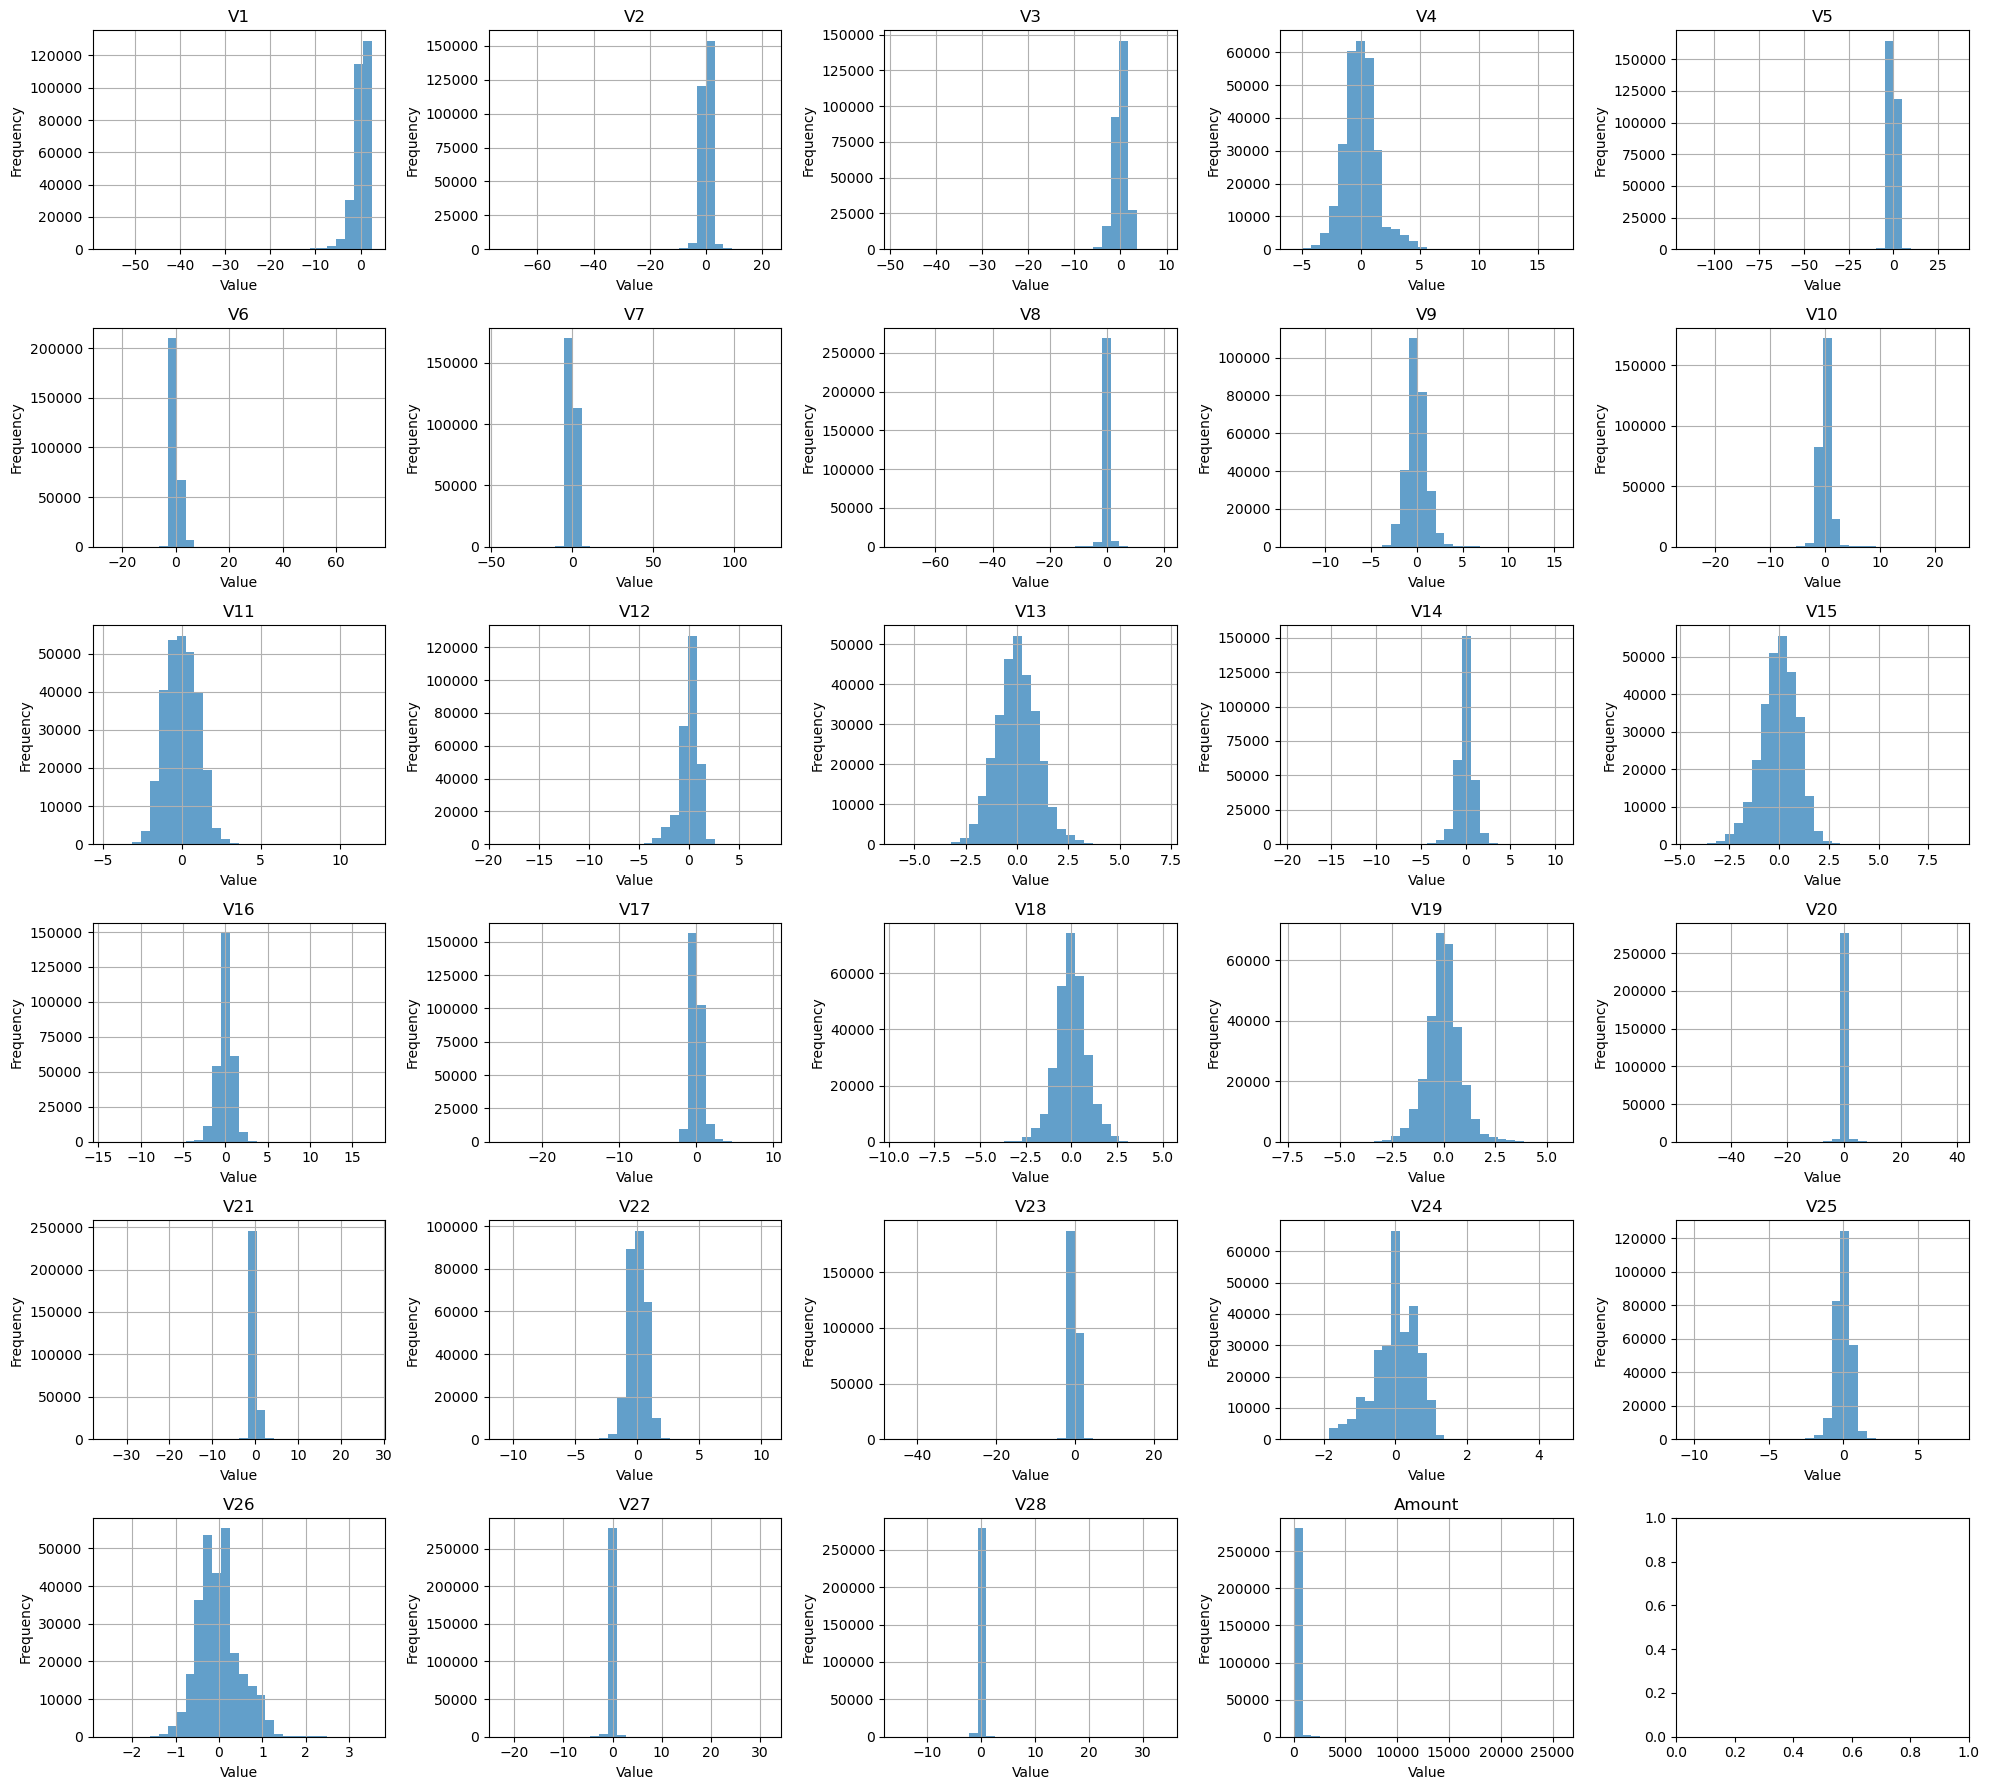

In [12]:
# 设置图形大小
num_features = len(data.columns)  # 特征数量
cols = 5  # 每行显示的图表数量
rows = (num_features + cols - 1) // cols  # 计算行数

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))  # 设置子图网格
axes = axes.flatten()  # 将子图对象展平，方便迭代

for i, column in enumerate(data.columns):
    if column != 'Class':  # 排除目标变量
        ax = axes[i]
        data[column].hist(bins=30, alpha=0.7, ax=ax)  # 绘制直方图
        ax.set_title(column)  # 设置标题
        ax.set_xlabel("Value")
        ax.set_ylabel("Frequency")

# 如果子图数量多于特征数量，隐藏多余的子图
for i in range(len(data.columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()  # 自动调整子图间距
plt.show()

### 2.2.2 密度图

C:\Users\avawa\AppData\Local\Temp\ipykernel_15928\1453106493.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], ax=ax, shade=True)  # 绘制密度图
C:\Users\avawa\AppData\Local\Temp\ipykernel_15928\1453106493.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], ax=ax, shade=True)  # 绘制密度图
C:\Users\avawa\AppData\Local\Temp\ipykernel_15928\1453106493.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], ax=ax, shade=True)  # 绘制密度图
C:\Users\avawa\AppData\Local\Temp\ipykernel_15928\1453106493.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This wil

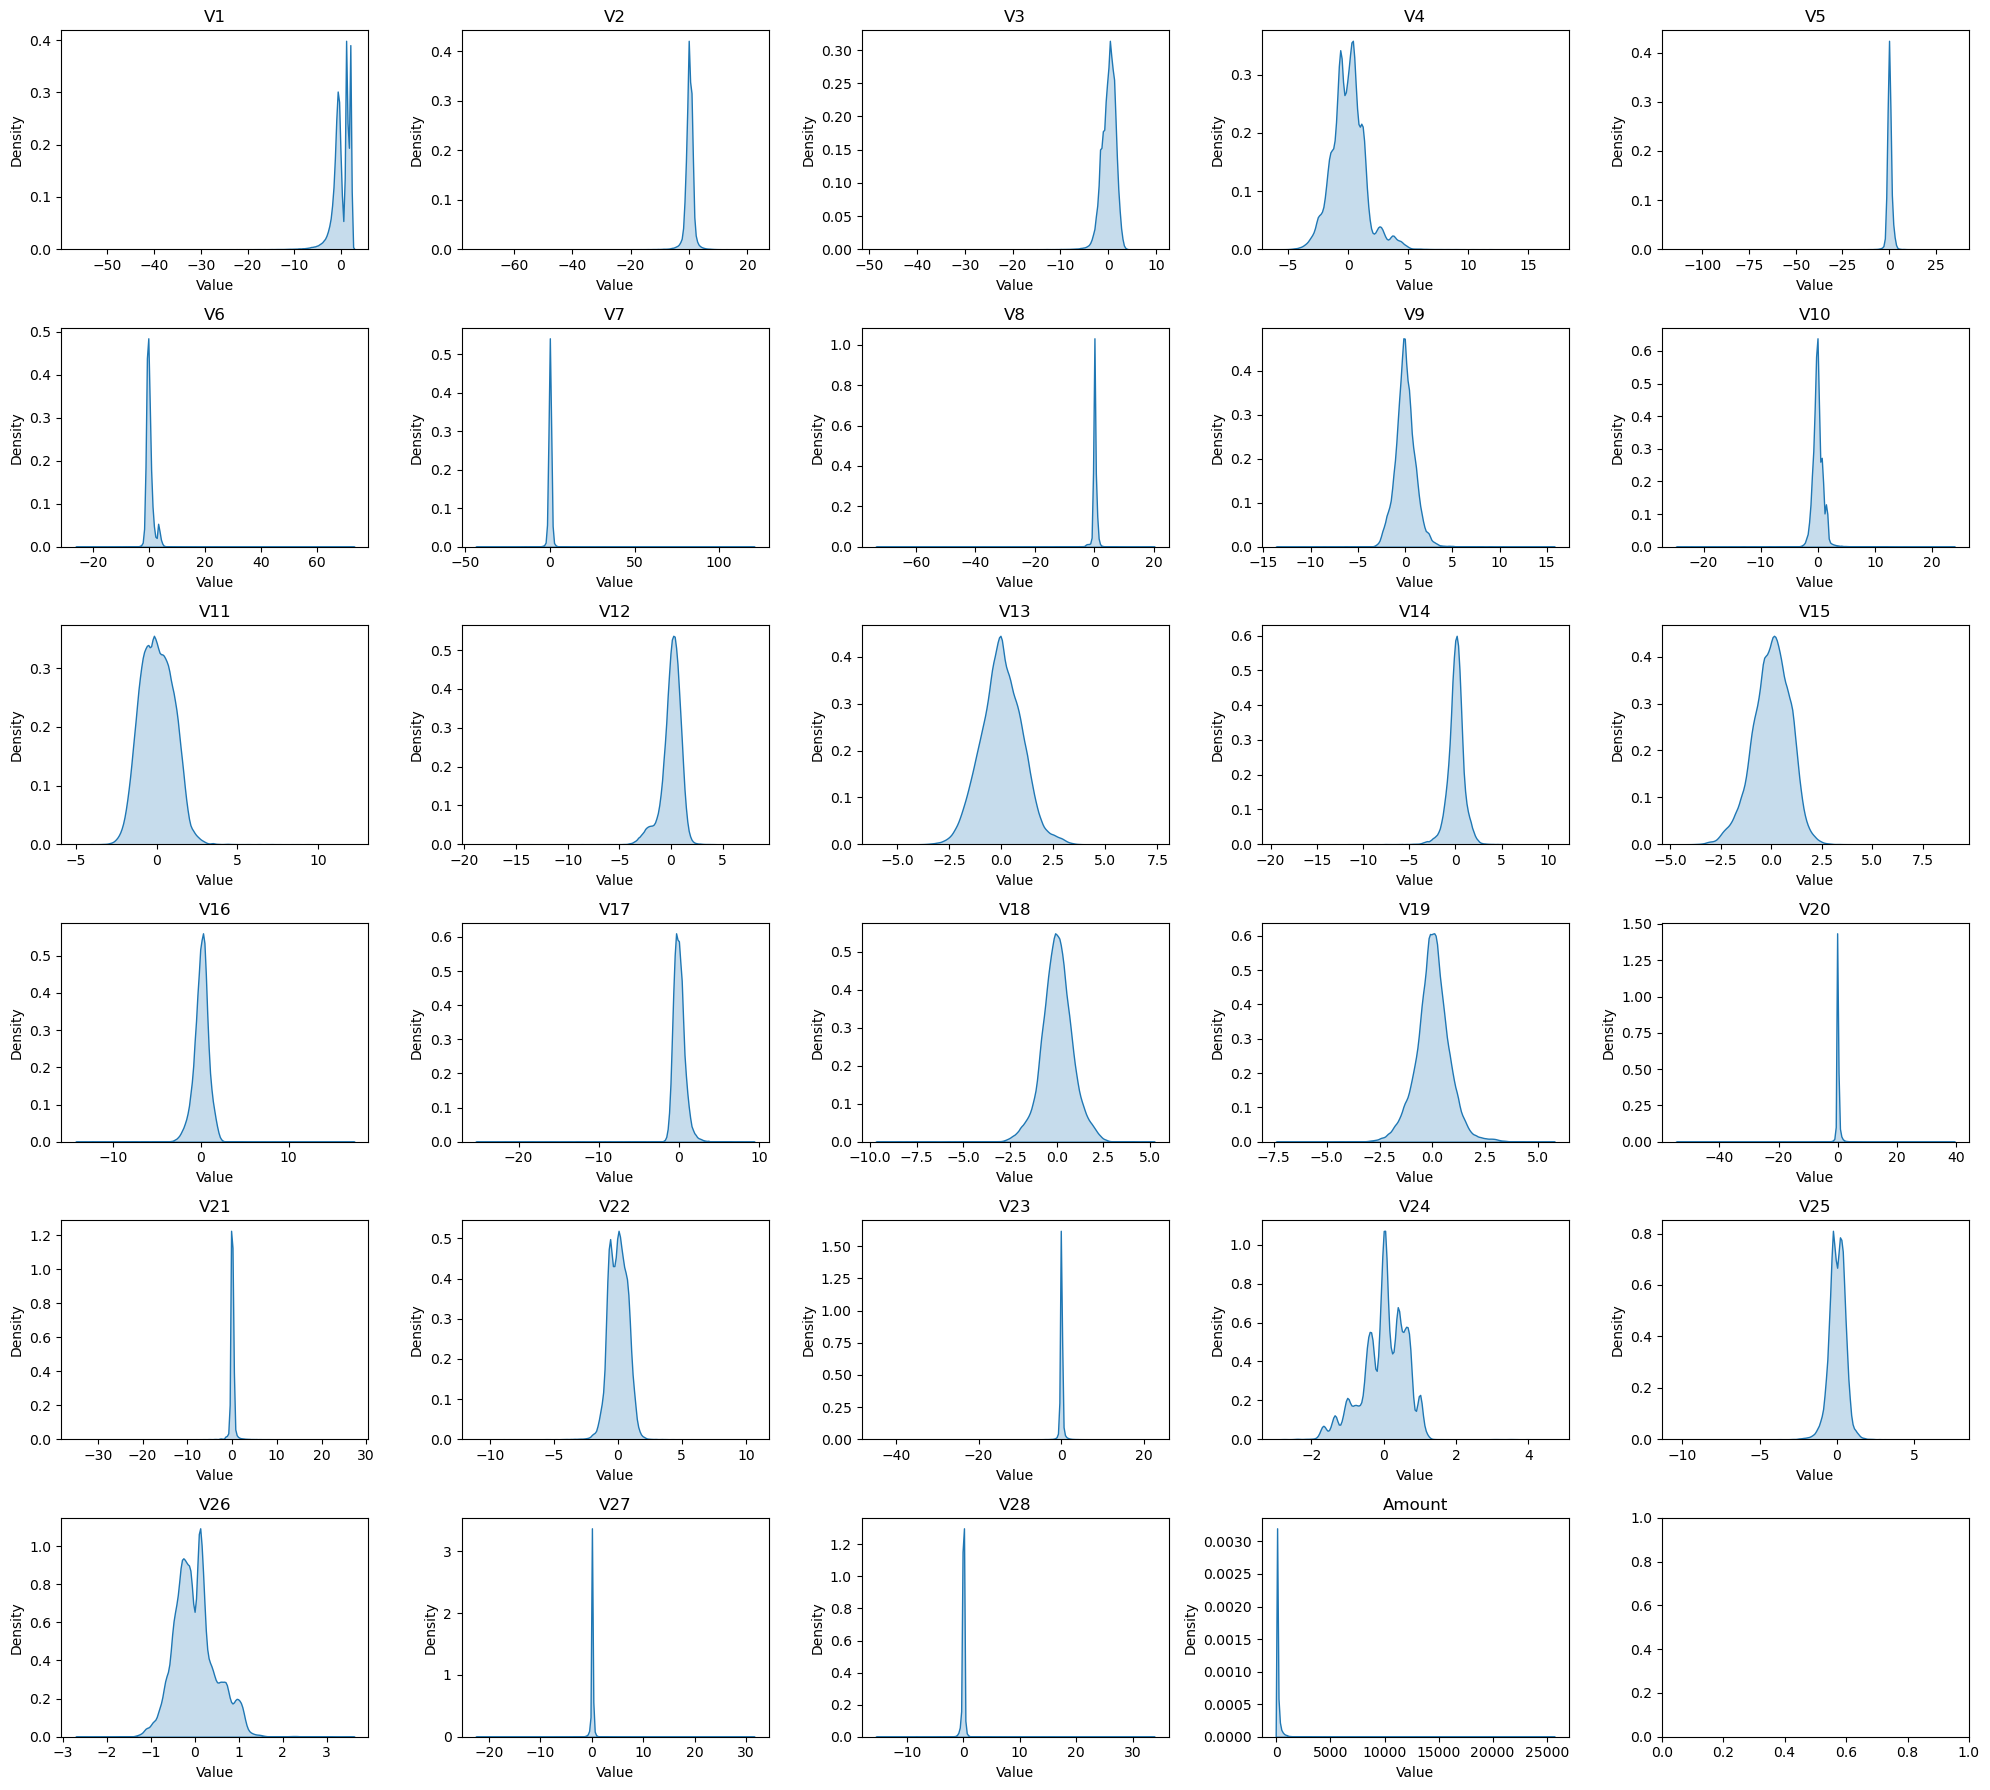

In [13]:
# 设置图形大小
num_features = len(data.columns)  # 特征数量
cols = 5  # 每行显示的图表数量
rows = (num_features + cols - 1) // cols  # 计算行数

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))  # 设置子图网格
axes = axes.flatten()  # 将子图对象展平以便于迭代

for i, column in enumerate(data.columns):
    if column != 'Class':  # 排除目标变量
        ax = axes[i]
        sns.kdeplot(data[column], ax=ax, shade=True)  # 绘制密度图
        ax.set_title(column)  # 设置标题
        ax.set_xlabel("Value")
        ax.set_ylabel("Density")

# 如果子图数量多于特征数量，隐藏多余的子图
for i in range(len(data.columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()  # 自动调整子图间距
plt.show()

## 2.3 处理不平衡数据

### 2.3.1 使用 SMOTE 进行过采样

Original dataset class distribution: Counter({0: 284315, 1: 492})
Resampled dataset class distribution: Counter({0: 284315, 1: 284315})


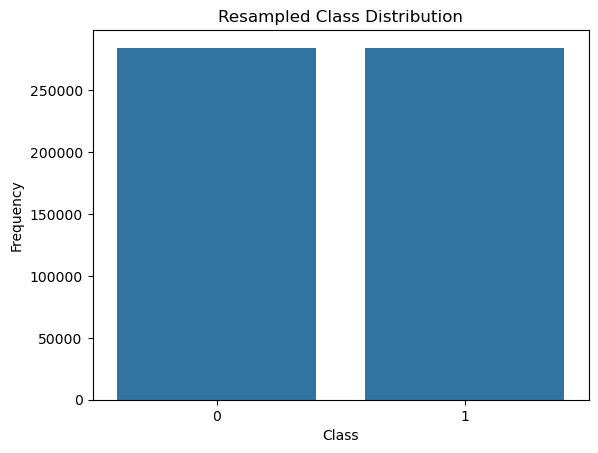

In [9]:
# 使用 SMOTE 进行过采样
from imblearn.over_sampling import SMOTE
from collections import Counter

# 分离特征和目标变量
X = data.drop(columns=['Class'])
y = data['Class']

# 应用 SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 检查重新采样后的目标变量分布
print(f"Original dataset class distribution: {Counter(y)}")
print(f"Resampled dataset class distribution: {Counter(y_resampled)}")

# 可视化重新采样后的分布
sns.countplot(x=y_resampled)
plt.title('Resampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

### 2.3.2 使用加权损失函数训练模型

In [10]:
# 使用加权损失函数训练模型
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight

# 计算类别权重
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"Class Weights: {class_weights_dict}")

# 初始化逻辑回归模型并设置 class_weight 参数
model = LogisticRegression(class_weight=class_weights_dict, random_state=42)
model.fit(X, y)

Class Weights: {0: 0.5008652375006595, 1: 289.4380081300813}


c:\Users\avawa\.conda\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.5008652375006595, 1: 289.4380081300813},
                   random_state=42)

# 3 数据可视化

## 3.1 相关性热图查看特征间关系

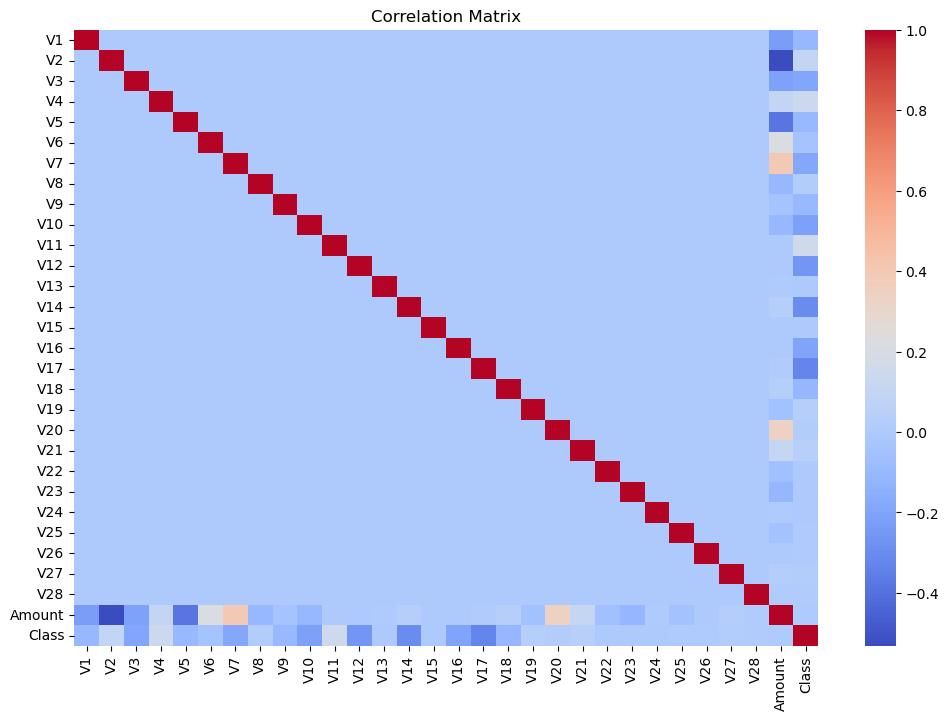

In [14]:
# 计算相关性矩阵
correlation_matrix = data.corr()

# 绘制相关性热图
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## 3.2 欺诈与非欺诈交易的特征差异

In [16]:
# 按目标变量分组
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

C:\Users\avawa\AppData\Local\Temp\ipykernel_15928\3635912487.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[column], label='Fraud', shade=True, color='red', ax=ax)
C:\Users\avawa\AppData\Local\Temp\ipykernel_15928\3635912487.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_fraud[column], label='Non-Fraud', shade=True, color='blue', ax=ax)
C:\Users\avawa\AppData\Local\Temp\ipykernel_15928\3635912487.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[column], label='Fraud', shade=True, color='red', ax=ax)
C:\Users\avawa\AppData\Local\Temp\ipykernel_15928\3635912487.py:13: FutureWarning: 

`shade

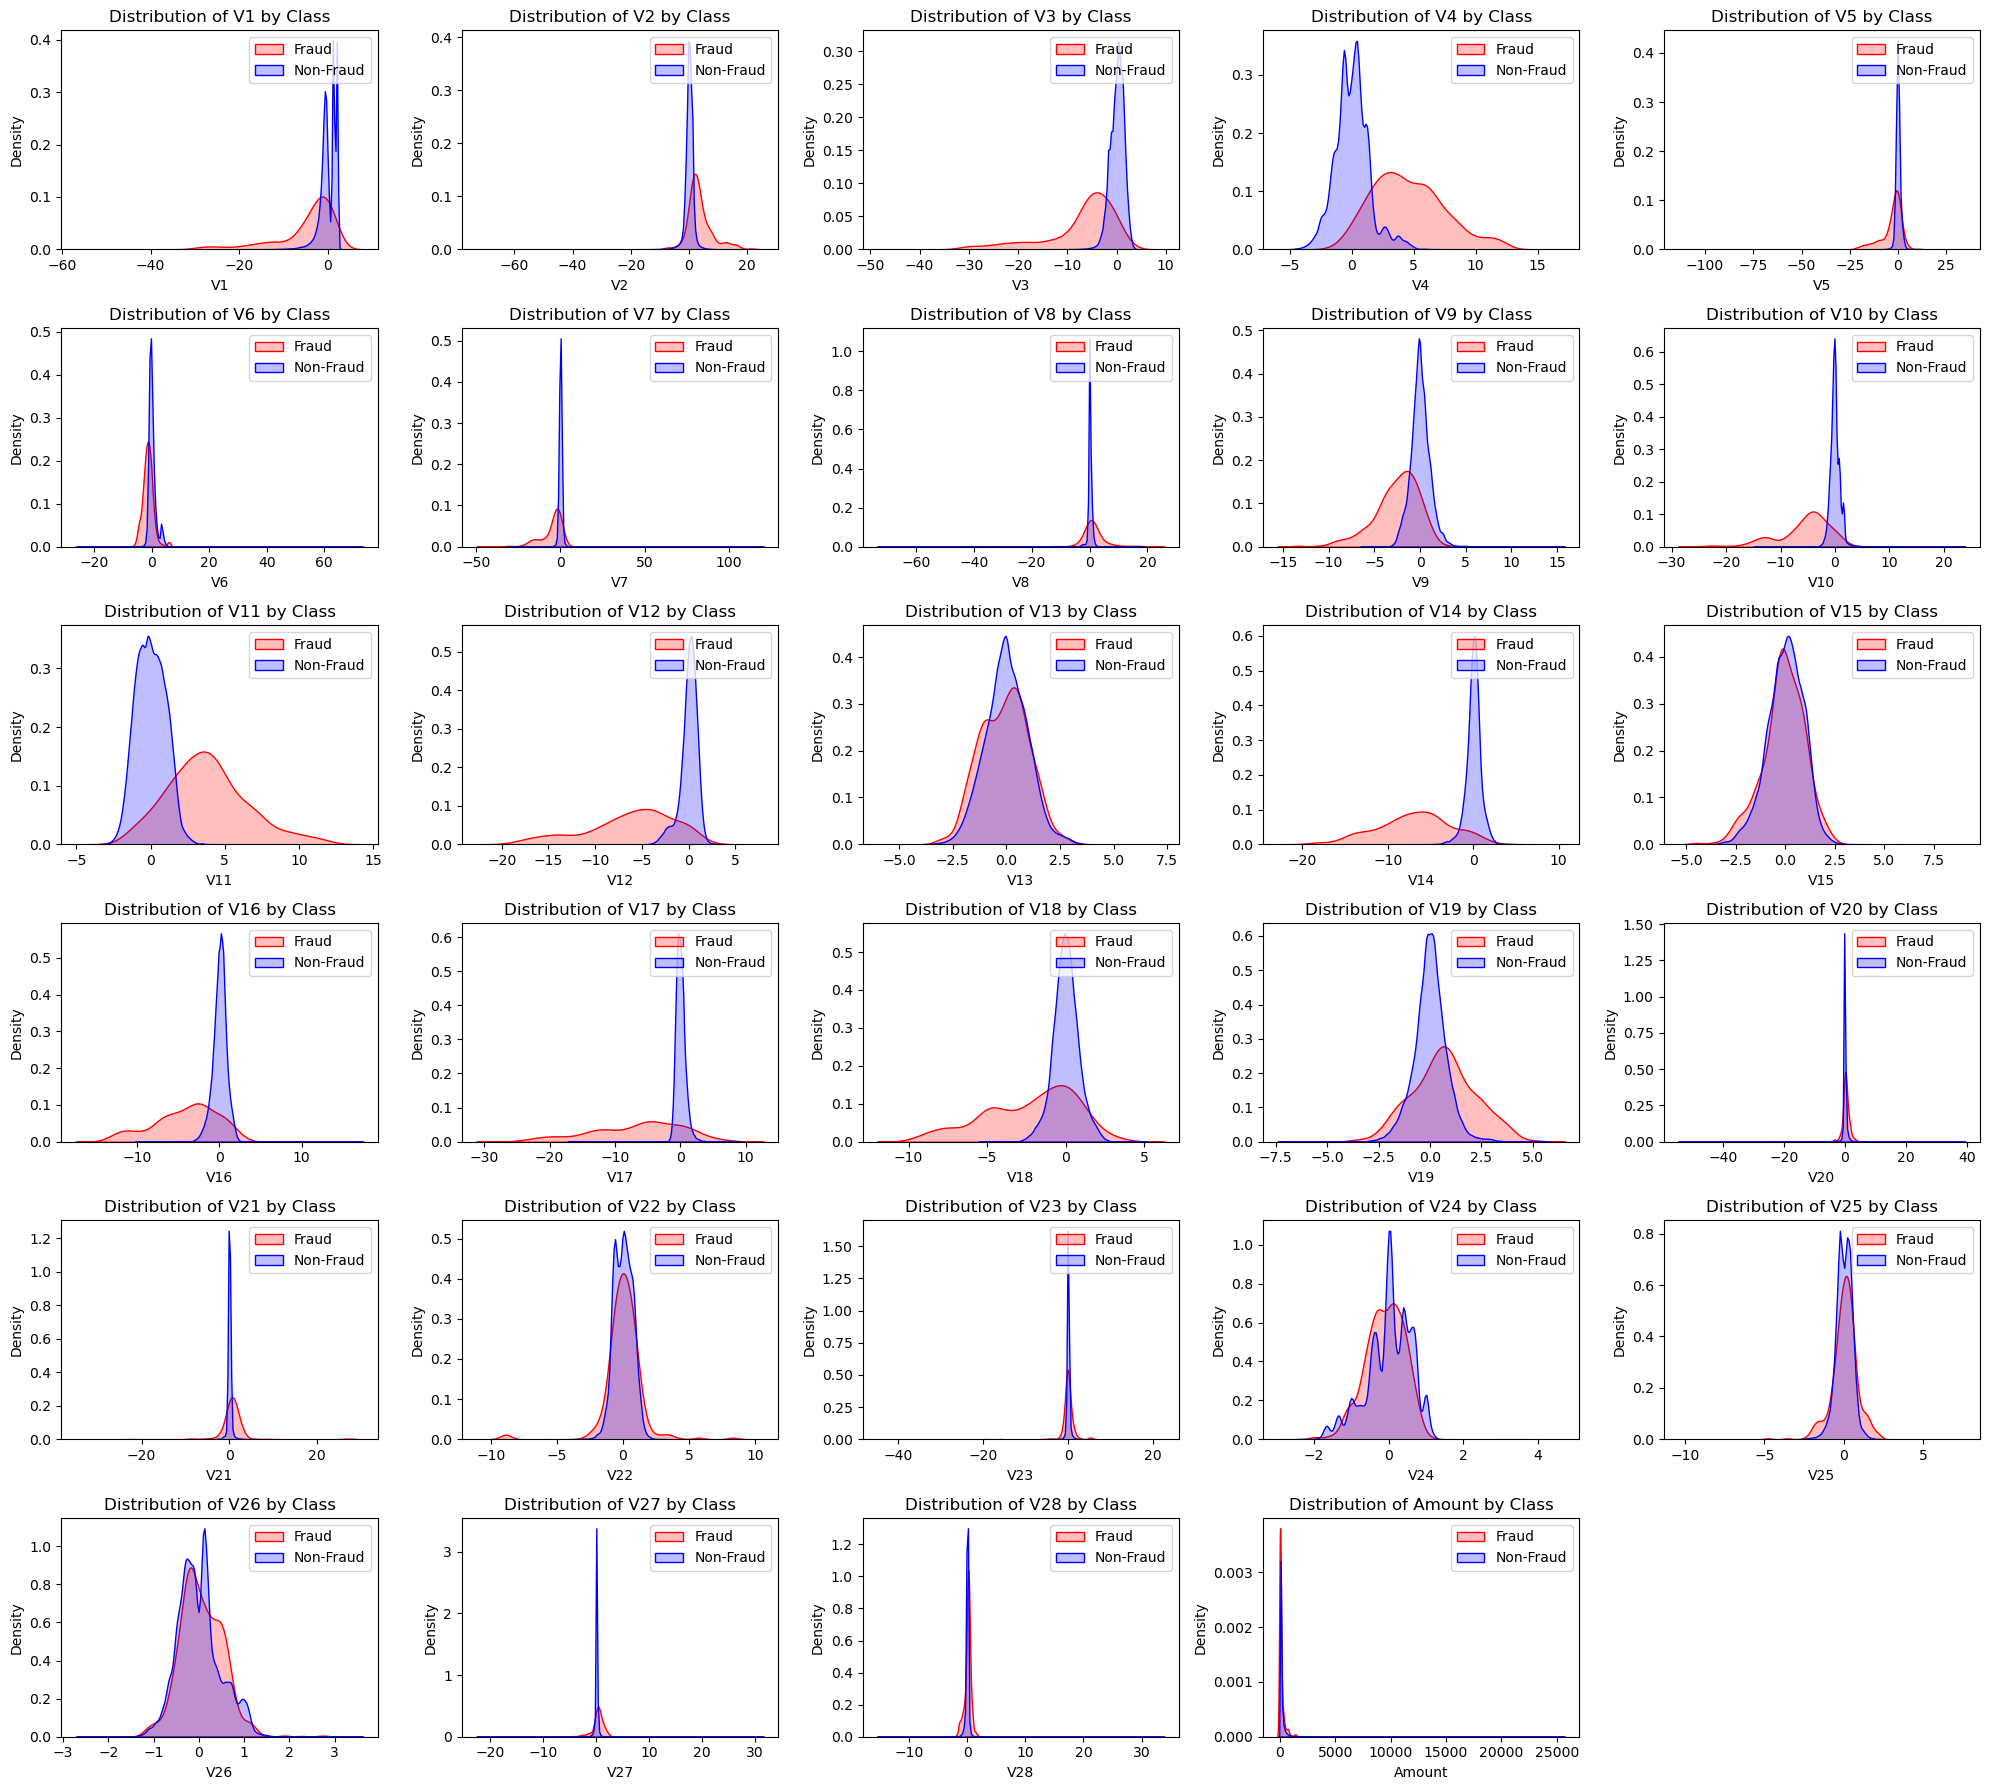

In [17]:
# 设置图形大小
num_features = len(data.columns) - 1  # 排除目标变量
cols = 5  # 每行显示的图表数量
rows = (num_features + cols - 1) // cols  # 计算行数

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))  # 设置子图网格
axes = axes.flatten()  # 将子图对象展平，方便迭代

for i, column in enumerate(data.columns):
    if column != 'Class':  # 排除目标变量
        ax = axes[i]
        sns.kdeplot(fraud[column], label='Fraud', shade=True, color='red', ax=ax)
        sns.kdeplot(non_fraud[column], label='Non-Fraud', shade=True, color='blue', ax=ax)
        ax.set_title(f'Distribution of {column} by Class')
        ax.set_xlabel(column)
        ax.set_ylabel('Density')
        ax.legend()

# 如果子图数量多于特征数量，隐藏多余的子图
for i in range(num_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()  # 自动调整子图间距
plt.show()

# 4 特征工程

## 4.1 特征缩放

In [25]:
# 对 Amount 特征进行标准化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# 如果需要对其他特征进行归一化，可以使用 MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
data_scaled = scaler_minmax.fit_transform(data)

## 4.2 特征选择

### 4.2.1 相关性分析

In [26]:
# 计算相关性矩阵
correlation_matrix = data.corr()

# 绘制热图
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 查看与目标变量 Class 的相关性
correlation_with_target = correlation_matrix['Class'].sort_values(ascending=False)
print("Correlation with target variable (Class):")
print(correlation_with_target)

### 4.2.2 特征重要性

In [ ]:
# 使用随机森林计算特征重要性
from sklearn.ensemble import RandomForestClassifier

# 分离特征和目标变量
X = data.drop(columns=['Class'])
y = data['Class']

# 训练随机森林模型
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# 获取特征重要性
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# 可视化特征重要性
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()